<a href="https://colab.research.google.com/github/Soyeon225/Flight-price-analysis/blob/main/notebooks/flight_price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

df = pd.read_csv('Clean_Dataset.csv')
df.head()




,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [ ]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


,0
Unnamed: 0,0
airline,0
flight,0
source_city,0
departure_time,0
stops,0
arrival_time,0
destination_city,0
class,0
duration,0


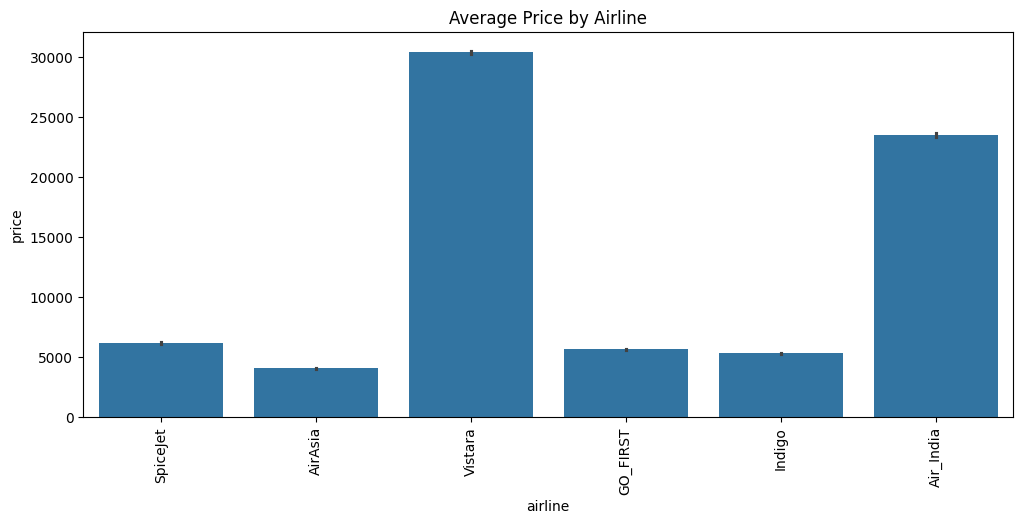

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,5))
sns.barplot(data=df, x='airline', y='price')
plt.xticks(rotation=90)
plt.title("Average Price by Airline")
plt.show()


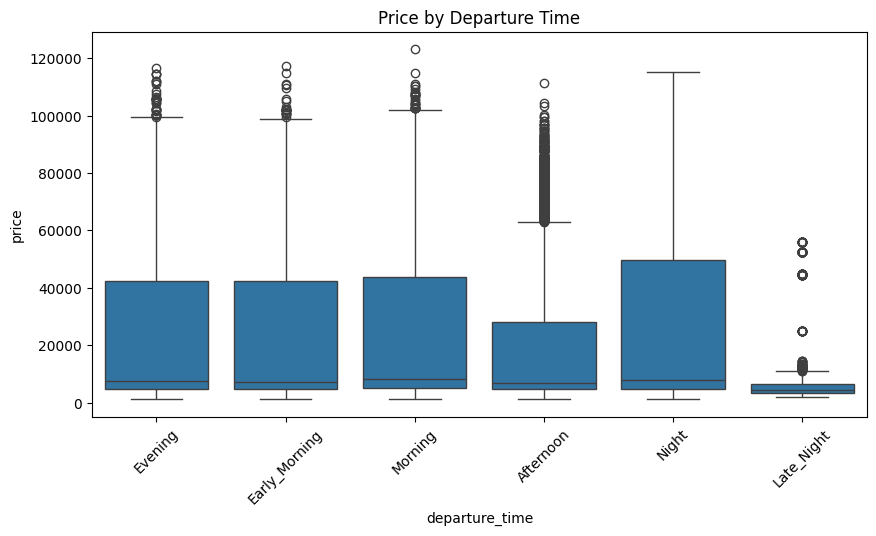

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, x='departure_time', y='price')
plt.xticks(rotation=45)
plt.title("Price by Departure Time")
plt.show()


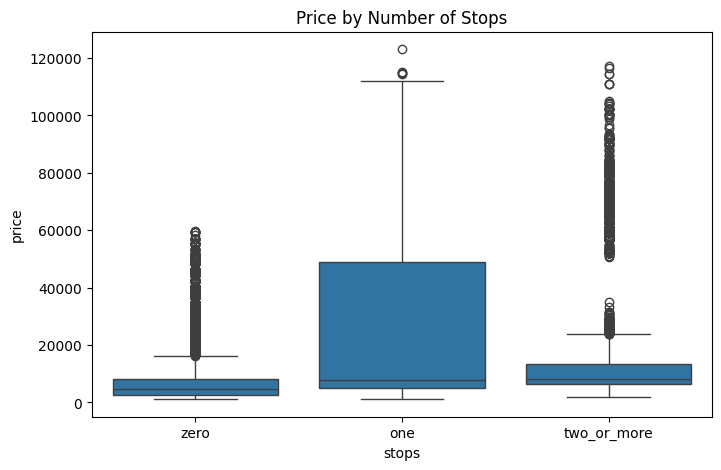

In [ ]:
plt.figure(figsize=(8,5))
sns.boxplot(data=df, x='stops', y='price')
plt.title("Price by Number of Stops")
plt.show()


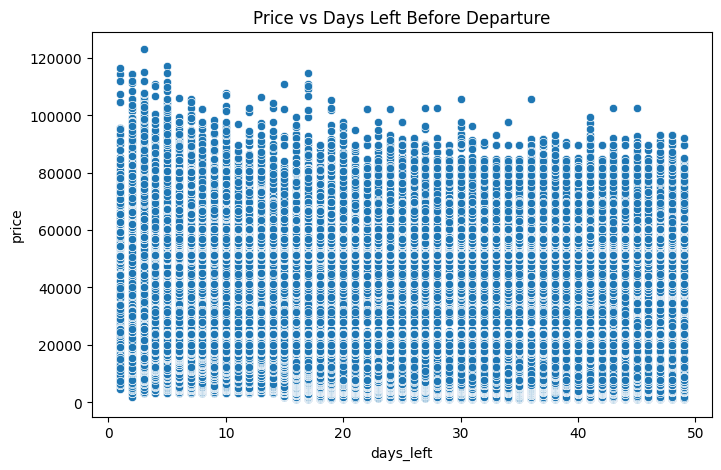

In [ ]:
plt.figure(figsize=(8,5))
sns.scatterplot(data=df, x='days_left', y='price')
plt.title("Price vs Days Left Before Departure")
plt.show()


In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split

# 1. 쓸모없는 ID 컬럼 제거
df_model = df.drop(columns=['Unnamed: 0', 'flight'])

# 2. 원-핫 인코딩 (문자 → 숫자)
df_encoded = pd.get_dummies(df_model, drop_first=True)

# 3. X(입력), y(정답) 나누기
X = df_encoded.drop('price', axis=1)
y = df_encoded['price']

# 4. train / test 나누기 (8:2 비율)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train.shape, X_test.shape


((240122, 30), (60031, 30))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
lr_rmse = np.sqrt(lr_mse)

# Random Forest
rf = RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)

print("Linear Regression RMSE:", lr_rmse)
print("Random Forest RMSE:", rf_rmse)


Linear Regression RMSE: 6761.713522201611
Random Forest RMSE: 2795.0710383882974


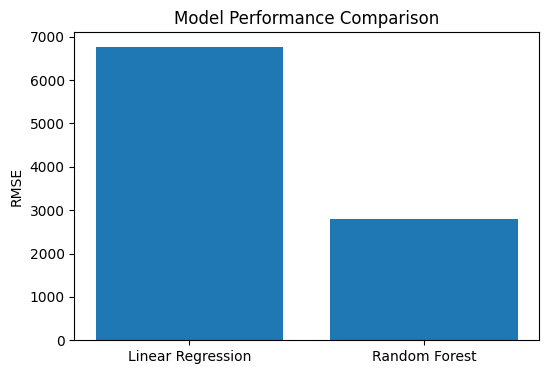

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
plt.bar(['Linear Regression', 'Random Forest'], [lr_rmse, rf_rmse])
plt.ylabel("RMSE")
plt.title("Model Performance Comparison")
plt.show()


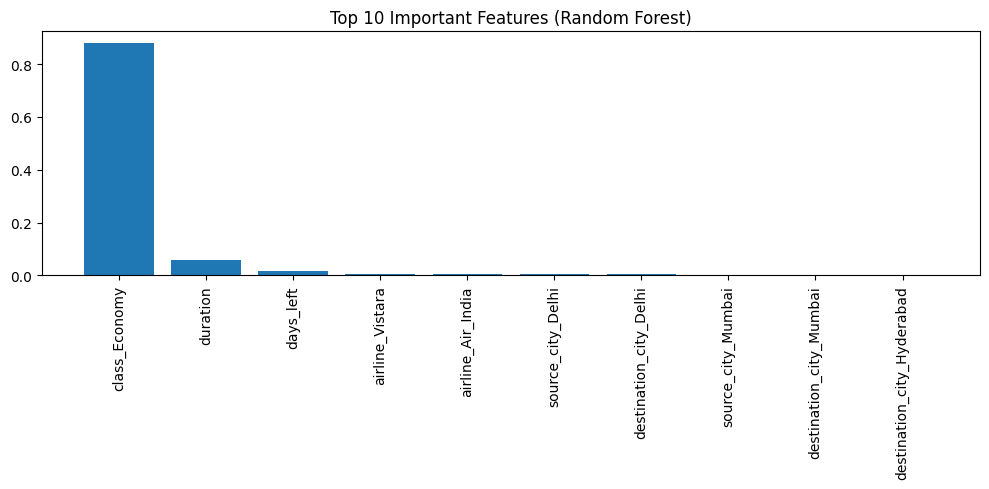

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1][:10]  # 상위 10개 변수 사용

plt.figure(figsize=(10,5))
plt.bar(range(len(indices)), importances[indices])
plt.xticks(range(len(indices)), X.columns[indices], rotation=90)
plt.title("Top 10 Important Features (Random Forest)")
plt.tight_layout()
plt.show()
